In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew
import scipy

In [2]:
def read_file(filename):
    x = pickle._Unpickler(open(filename,'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

files = []
for n in range(12,16):
    s = 's'
    if n<10:
        s+='0'
    s += str(n)+'.dat'
    files.append(s)

labels = []
data   = []
for i in files:
    trial = read_file(i)
    labels.append(trial['labels'])
    data.append(trial['data'])
    
    
labels = np.array(labels)
labels = labels.flatten()
labels = labels.reshape(160, 4)


data = np.array(data)
data = data.flatten()
data = data.reshape(160, 40, 8064)

In [3]:
labels.shape

(160, 4)

In [4]:
data.shape

(160, 40, 8064)

#  One Hot Encoding

In [5]:
valenciaData = labels[:, :1]
arousalData  = labels[:,1:2]
medianValencia = np.median(valenciaData)
medianArousle  = np.median(arousalData)

In [6]:
def OneHotEncoding(valor,median):
    if valor >= median:
        return 1
    else:
        return 0

In [7]:
DFValencia = []
for i in valenciaData:
    DFValencia.append([OneHotEncoding(i[0],medianValencia)])
    
DFArousal = []
for i in arousalData:
    DFArousal.append([OneHotEncoding(i[0],medianArousle)])

DFValencia = pd.DataFrame(data =DFValencia,columns=['Valence'])
DFArousal = pd.DataFrame(data =DFArousal,columns=['Arousal'])

In [8]:
#ETIQUETA VALENCIA Y ETIQUETA AROUSEL
DFValenciaArrousel = pd.concat([DFValencia,DFArousal],axis=1)
DFValenciaArrousel

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


# Considerar únicamente 32 de los 40 canales 

In [51]:
egg_data = []
N=32
for i in range (len(data)):
    for j in range (N):
        egg_data.append(data[i,j])
egg_data = np.reshape(egg_data, (len(data),N,len(data[0,0]))) #(160, 32, 8064)
print(egg_data.shape)

(160, 32, 8064)


# Extraer características de la data (media, varianza, mediana, curtosis,skewness)

In [52]:
media     =  np.mean(egg_data, axis=2)
varianza  =  np.var(egg_data, axis=2) 
mediana   =  np.median(egg_data, axis=2)
curtosis  =  scipy.stats.kurtosis(egg_data, axis=2)
asimetria =  scipy.stats.skew(egg_data, axis=2)
totalData =  np.concatenate((media, varianza, mediana,curtosis,asimetria),axis=1) 
totalData =  pd.DataFrame(totalData)
totalData

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.147541,-0.136242,-0.230463,-0.485368,-0.191395,-0.101293,-0.149035,0.214239,0.229560,0.270990
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.134745,-0.213549,-0.192078,-0.175423,-0.107930,-0.014033,-0.125412,0.324328,0.259344,0.265191
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.125861,-0.327134,-0.222775,-0.037336,-0.168785,-0.081766,-0.119669,0.322914,0.314184,0.348474
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.053120,-0.125716,-0.145243,-0.078934,-0.129396,-0.067172,-0.095273,0.140745,0.105676,0.187967
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.329096,-0.189732,-0.397356,-0.267826,-0.351554,-0.208562,-0.317293,0.453197,0.434129,0.491896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.749911,-0.935890,0.037145,-0.034464,-0.364933,-0.534069,0.096746,-0.423109,-0.314202,0.111795
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.821177,-0.843650,0.109154,-0.377837,-0.633505,-0.732398,0.015434,-0.657737,-0.563958,0.154532
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.404489,-0.477506,0.034463,-0.176934,-0.180343,-0.272553,-0.011187,-0.350077,-0.328384,0.044254
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,1.128420,-1.154964,-0.138953,-0.349398,-0.807273,-1.163223,0.006002,-0.885491,-0.757759,0.288144


In [53]:
#UNIMOS CON LA ETIQUETA VALENCIA Y ETIQUETA AROUSEL
totalData = pd.concat([totalData,DFValenciaArrousel],axis=1)
totalData

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.230463,-0.485368,-0.191395,-0.101293,-0.149035,0.214239,0.229560,0.270990,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.192078,-0.175423,-0.107930,-0.014033,-0.125412,0.324328,0.259344,0.265191,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.222775,-0.037336,-0.168785,-0.081766,-0.119669,0.322914,0.314184,0.348474,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.145243,-0.078934,-0.129396,-0.067172,-0.095273,0.140745,0.105676,0.187967,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.397356,-0.267826,-0.351554,-0.208562,-0.317293,0.453197,0.434129,0.491896,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.037145,-0.034464,-0.364933,-0.534069,0.096746,-0.423109,-0.314202,0.111795,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.109154,-0.377837,-0.633505,-0.732398,0.015434,-0.657737,-0.563958,0.154532,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.034463,-0.176934,-0.180343,-0.272553,-0.011187,-0.350077,-0.328384,0.044254,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.138953,-0.349398,-0.807273,-1.163223,0.006002,-0.885491,-0.757759,0.288144,0,0


<AxesSubplot:>

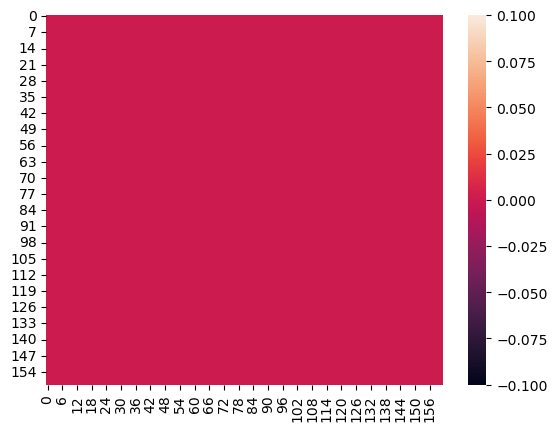

In [54]:
totalData.isnull()
sns.heatmap(totalData.isna())

In [55]:
totalData

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.230463,-0.485368,-0.191395,-0.101293,-0.149035,0.214239,0.229560,0.270990,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.192078,-0.175423,-0.107930,-0.014033,-0.125412,0.324328,0.259344,0.265191,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.222775,-0.037336,-0.168785,-0.081766,-0.119669,0.322914,0.314184,0.348474,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.145243,-0.078934,-0.129396,-0.067172,-0.095273,0.140745,0.105676,0.187967,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.397356,-0.267826,-0.351554,-0.208562,-0.317293,0.453197,0.434129,0.491896,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.037145,-0.034464,-0.364933,-0.534069,0.096746,-0.423109,-0.314202,0.111795,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.109154,-0.377837,-0.633505,-0.732398,0.015434,-0.657737,-0.563958,0.154532,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.034463,-0.176934,-0.180343,-0.272553,-0.011187,-0.350077,-0.328384,0.044254,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.138953,-0.349398,-0.807273,-1.163223,0.006002,-0.885491,-0.757759,0.288144,0,0


# RED NEURONAL

# Division de datos

In [56]:
from sklearn.model_selection import train_test_split

x = totalData.iloc[:, :-2]
y = totalData[['Valence','Arousal']]

In [57]:
x

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.147541,-0.136242,-0.230463,-0.485368,-0.191395,-0.101293,-0.149035,0.214239,0.229560,0.270990
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.134745,-0.213549,-0.192078,-0.175423,-0.107930,-0.014033,-0.125412,0.324328,0.259344,0.265191
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.125861,-0.327134,-0.222775,-0.037336,-0.168785,-0.081766,-0.119669,0.322914,0.314184,0.348474
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.053120,-0.125716,-0.145243,-0.078934,-0.129396,-0.067172,-0.095273,0.140745,0.105676,0.187967
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.329096,-0.189732,-0.397356,-0.267826,-0.351554,-0.208562,-0.317293,0.453197,0.434129,0.491896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.749911,-0.935890,0.037145,-0.034464,-0.364933,-0.534069,0.096746,-0.423109,-0.314202,0.111795
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.821177,-0.843650,0.109154,-0.377837,-0.633505,-0.732398,0.015434,-0.657737,-0.563958,0.154532
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.404489,-0.477506,0.034463,-0.176934,-0.180343,-0.272553,-0.011187,-0.350077,-0.328384,0.044254
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,1.128420,-1.154964,-0.138953,-0.349398,-0.807273,-1.163223,0.006002,-0.885491,-0.757759,0.288144


In [58]:
y

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

# CREACION DEL MODELO

In [60]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix
from keras import regularizers

In [61]:
model = Sequential()
model.add(Dense(64, input_dim=160, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy']) 

In [62]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 8ms/step - loss: 0.3627 - binary_accuracy: 0.4821
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3268 - binary_accuracy: 0.4821
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2831 - binary_accuracy: 0.5268
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2654 - binary_accuracy: 0.5446
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2567 - binary_accuracy: 0.5446
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2471 - binary_accuracy: 0.5536
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2547 - binary_accuracy: 0.5357
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2504 - binary_accuracy: 0.5625
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2490 - binary_accuracy: 0.5714
Epoch 10/100
4/4 [==============================] - 0s 6ms/step

In [63]:
scores = model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 7ms/step - loss: 0.2387 - binary_accuracy: 0.5982


In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión del modelo en los datos de prueba:', test_acc)

2/2 [==============================] - 0s 0s/step - loss: 0.2459 - binary_accuracy: 0.5208
Precisión del modelo en los datos de prueba: 0.5208333134651184


# NORMALIZACION DE DATOS

In [65]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler para normalizar los datos
scaler = StandardScaler()
# Ajusta el objeto scaler al conjunto de datos de entrenamiento
scaler.fit(x_train)
# Normaliza los datos de entrenamiento y de prueba utilizando el objeto scaler
x_train = scaler.transform(x_train)
# Ajusta el objeto scaler al conjunto de datos de entrenamiento
scaler.fit(x_test)
# Normaliza los datos de entrenamiento y de prueba utilizando el objeto scaler
x_test = scaler.transform(x_test)

In [78]:
model = Sequential()
model.add(Dense(64, input_dim=160, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy']) 

In [79]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.3299 - binary_accuracy: 0.4821
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2848 - binary_accuracy: 0.4911
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2546 - binary_accuracy: 0.5536
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2388 - binary_accuracy: 0.5893
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2338 - binary_accuracy: 0.5714
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2286 - binary_accuracy: 0.6071
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2243 - binary_accuracy: 0.6161
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2188 - binary_accuracy: 0.6429
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2154 - binary_accuracy: 0.6607
Epoch 10/100
4/4 [==============================] - 0s 6ms/step 

In [80]:
scores = model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.1228 - binary_accuracy: 0.7589


In [81]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión del modelo en los datos de prueba:', test_acc)

2/2 [==============================] - 0s 947us/step - loss: 0.3038 - binary_accuracy: 0.5833
Precisión del modelo en los datos de prueba: 0.5833333134651184
